In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

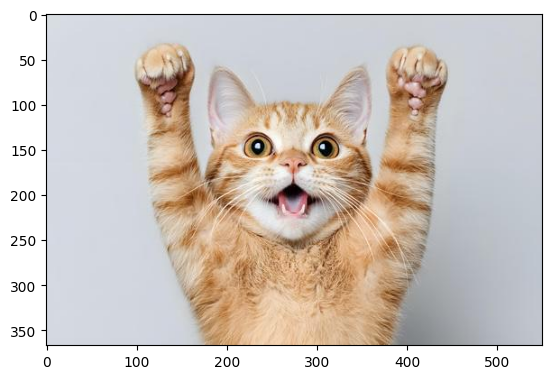

In [6]:
image_data = mpimg.imread('cat.jpg')
plt.imshow(image_data)

In [35]:
def converter(img):
    height = len(img)
    width = len(img[0])
    points = []
    for y in range(height):
        for x in range(width):
            pixel = img[y][x]
            r = pixel[0]
            g = pixel[1]
            b = pixel[2]
            points.append([x, y, r, g, b])
    return points
points = converter(image_data)
points = np.array(points, dtype=float)

In [94]:
def convert_back(smth):
    x = smth[:, 0]
    y= smth[:, 1]
    colors = smth[:, 2:5]

    if colors.max() > 1.0:
        colors = colors / 255.0

    plt.scatter(x, -y, c=colors)
    plt.axis('equal')
    plt.show()

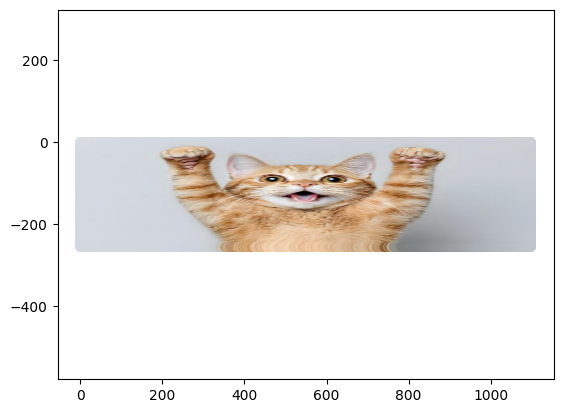

In [95]:
def stretch(points, a, b):
    A = np.array([
        [a, 0, 0, 0, 0],
        [0, b, 0, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1],
    ], dtype=float)
    return points @ A

stretched = stretch(points, 2, 0.7)

convert_back(stretched)

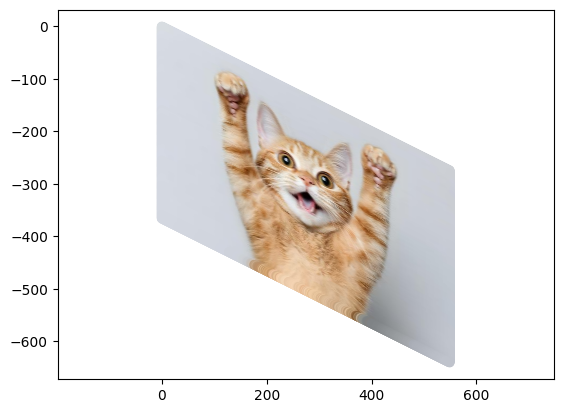

In [97]:
def shear(points, a, b):
    A = np.array([
        [1, a, 0, 0, 0],
        [b, 1, 0, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1],
    ], dtype=float)
    return points @ A

shearted = shear(points, 0.5, 0)

convert_back(shearted)

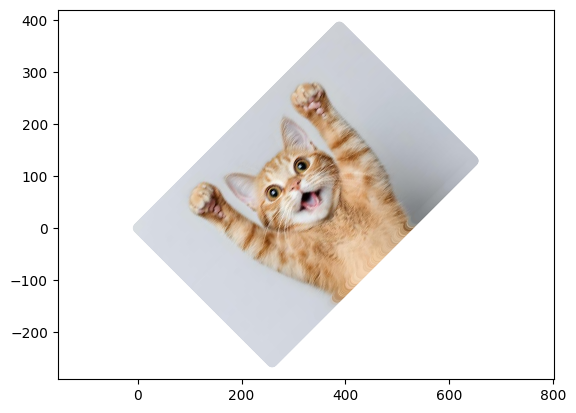

In [98]:
def rotation(points, teta):
    teta = np.deg2rad(teta)
    A = np.array([
        [np.cos(teta), -np.sin(teta), 0, 0, 0],
        [np.sin(teta), np.cos(teta), 0, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1],
    ], dtype=float)
    return points @ A

rot = rotation(points, 45)

convert_back(rot)

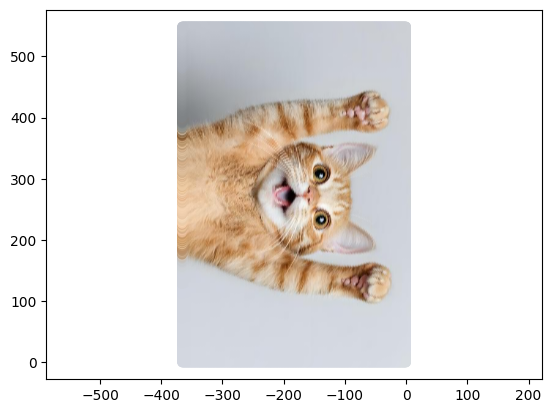

In [101]:
def reflection(points, a, b):
    A2 = np.array([
        [a**2 - b**2, 2*a*b],
        [2*a*b, b**2 - a**2]
    ], dtype=float) / (a**2 + b**2)
    A = np.array([
        [A2[0,0], A2[0,1], 0, 0, 0],
        [A2[1,0], A2[1,1], 0, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1],
    ], dtype=float)
    return points @ A

ref = reflection(points, 1, -1)
convert_back(ref)